# Basic usage

Using UltraNest in a project is as simple as:

    import ultranest

    sampler = ultranest.ReactiveNestedSampler(param_names, my_likelihood, my_prior_transform,
        log_dir="myanalysis", resume=True)
    result = sampler.run()
    sampler.print_results()

All parameters and methods of ReactiveNestedSampler are documented in the [API reference](https://johannesbuchner.github.io/UltraNest/ultranest.html#ultranest.integrator.ReactiveNestedSampler).

## Simple example

To demonstrate, we define a spectral line fitting problem.

Lets generate some data over a wavelength range with a noisy signal.

In [1]:
import numpy as np
x = np.linspace(400, 800, 100)
yerr = 1.0
y = np.random.normal(20 * np.exp(-0.5 * ((x-500)/4.2)**2), yerr)

Text(0, 0.5, 'y')

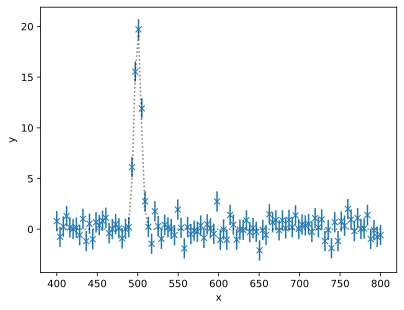

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.errorbar(x, y, yerr=yerr, ls=' ', marker='x')
plt.plot(x, 20 * np.exp(-0.5 * ((x-500)/4.2)**2), ls=':', alpha=0.5, color='k')
plt.xlabel('x')
plt.ylabel('y');

This problem has 3 parameters: The location, amplitude and width of the gaussian line. We assume that the noise level is known.

In [3]:
param_names = ['location', 'amplitude', 'width']

In UltraNest, the parameter space is defined through a transform
from unit values (0...1) to the physical range.

The next function demonstrates:

* a uniform prior for a location parameter
* a log-uniform prior for a scale parameter
* a log-normal prior

In [4]:
import scipy.stats

def my_prior_transform(cube):
    params = cube.copy()

    # transform location parameter: uniform prior
    lo = 400
    hi = 800
    params[0] = cube[0] * (hi - lo) + lo

    # transform amplitude parameter: log-uniform prior
    lo = 0.1
    hi = 100
    params[1] = 10**(cube[1] * (np.log10(hi) - np.log10(lo)) + np.log10(lo))

    # More complex prior, you can use the ppf functions 
    # from scipy.stats, such as scipy.stats.norm(mean, std).ppf
    
    # transform for width:
    # a log-normal centered at 1 +- 1dex
    params[2] = 10**scipy.stats.norm.ppf(cube[2], 0, 1)

    return params


Next, we need to specify the data likelihood given certain parameters:

In [5]:
from numpy import log

def my_likelihood(params):
    location, amplitude, width = params
    # compute intensity at every x position according to the model
    y_model = amplitude * np.exp(-0.5 * ((x - location)/width)**2)
    # compare model and data with gaussian likelihood:
    like = -0.5 * (((y_model - y)/yerr)**2).sum()
    return like

We are now ready to explore this parameter space!

In [6]:
import ultranest

sampler = ultranest.ReactiveNestedSampler(param_names, my_likelihood, my_prior_transform)

[ReactiveNestedSampler](ultranest.rst#ultranest.integrator.ReactiveNestedSampler)
has several options to specify what logging and file output it should produce.


In [7]:
result = sampler.run()
sampler.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01  


[ultranest] Likelihood function evaluations: 17906


[ultranest]   logZ = -51.22 +- 0.1568


[ultranest] Effective samples strategy satisfied (ESS = 1238.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.09 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.32, need <0.5)


[ultranest]   logZ error budget: single: 0.22 bs:0.16 tail:0.01 total:0.16 required:<0.50


[ultranest] done iterating.



logZ = -51.207 +- 0.285
  single instance: logZ = -51.207 +- 0.181
  bootstrapped   : logZ = -51.218 +- 0.285
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    location            500.23 +- 0.23
    amplitude           20.10 +- 0.85
    width               4.60 +- 0.23


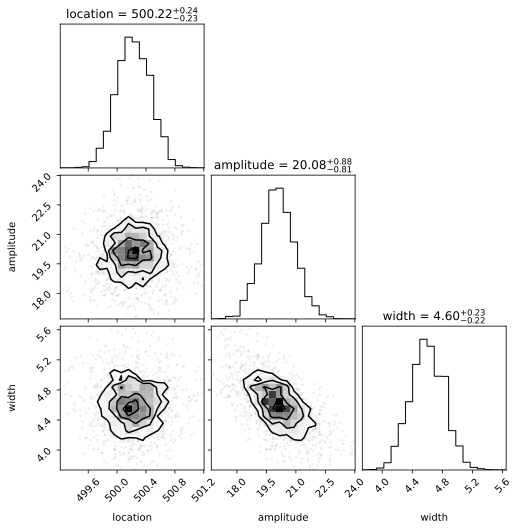

In [8]:
from ultranest.plot import cornerplot
cornerplot(result)


    sampler = ultranest.ReactiveNestedSampler(
        param_names, 
        loglike=my_likelihood, 
        transform=my_prior_transform,
        ## additional parameter properties:
        # identify circular parameters
        wrapped_params=[False, False, False],
        # add derived calculations
        derived_param_names=[], 
        # store outputs for resuming:
        log_dir='my_folder/,
        resume='resume' or 'overwrite' or 'subfolder',
        )



Both [ReactiveNestedSampler](modules.html#ultranest.integrator.ReactiveNestedSampler) and [its .run() function](modules.html#ultranest.integrator.ReactiveNestedSampler.run)  have several options to specify what logging and file output they should produce, and how they should explore the parameter space.



You can create more diagnostic plots with:

    sampler.plot_run()
    sampler.plot_trace()
    sampler.plot_corner()

##  Further topics

Check out the rest of the documentation and the tutorials.

They illustrate the features of UltraNest, including:

* Model comparison
* Visualisation
* Saving & Resuming output
* Controlling output
* Parallelisation
* Handling high dimensional problems
* ...